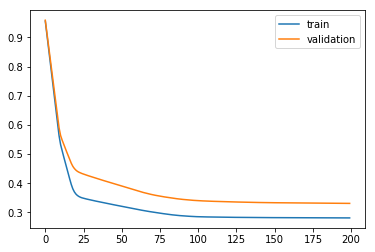

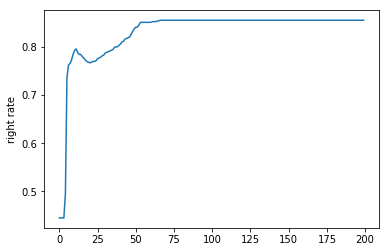

In [12]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def loss(x, y, w):
    pre_y = np.sum(w * x, axis = 1)
    l = y * pre_y
    a = 0
    for i in range(0, x.shape[0]):
        a = a + max(0, 1 - l[i])
        
    return np.linalg.norm(w)**2 / 2 + a


X,y = load_svmlight_file("australian_scale")
X = X.toarray()
X = np.c_[np.ones((X.shape[0], 1)),X]
W = np.zeros((1, X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

time = 200
loss_train = np.zeros((time), np.float)
loss_validation = np.zeros((time), np.float)
prediction_rate = np.zeros((time))
learning_rate = 0.0001
threshold = -0.5

for i in range(0, time):
    G = W
    pre_y = np.sum(W * X_train, axis = 1)
    a = 1 - y_train * pre_y
    for j in range(0, X_train.shape[0]):
        if a[j] >= 0:
            G = G - X_train[j] * y_train[j]
        else:
            G = G - 0
        
    D = -G
    
    W = W + learning_rate * D

    pre = np.sum(W * X, axis = 1)
    
    count = 0
    for j in range(0, X.shape[0]):
        if pre[j] > threshold:
            pre[j] = 1
        elif pre[j] < threshold:
            pre[j] = -1
        
        if pre[j] == y[j]:
            count += 1
            
    prediction_rate[i] = count / X.shape[0]
    
    loss_train[i] = loss(X_train, y_train, W)
    loss_validation[i] = loss(X_test, y_test, W)
    

loss_train = loss_train / X_train.shape[0]
loss_validation = loss_validation / X_test.shape[0]
plt.plot(loss_train, label = 'train')
plt.plot(loss_validation, label = 'validation')
plt.legend()
plt.show()

plt.plot(prediction_rate)
plt.ylabel('right rate')
plt.show()

